https://stepik.org/lesson/1370114/step/7

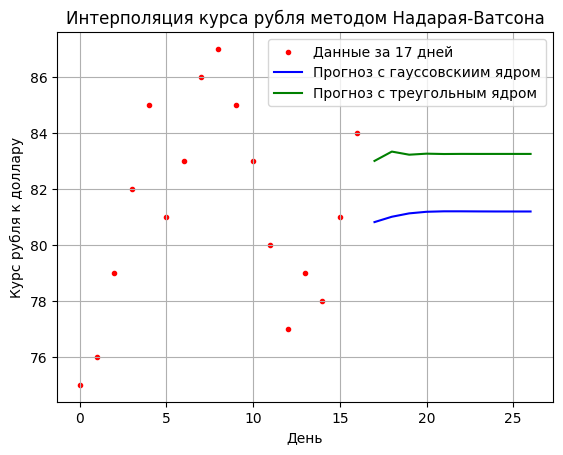

In [ ]:
import numpy as np

rub_usd = np.array([75, 76, 79, 82, 85, 81, 83, 86, 87, 85, 83, 80, 77, 79, 78, 81, 84])

x = np.arange(0, len(rub_usd), 1) # значения по оси абсцисс [-5; 5] с шагом 0.1
y = rub_usd # значения функции по оси ординат

x_est = x * 1 # будем список расширять постепенно на 10 дней
y_est = y * 1 # список под прогноз, который будем продолжать
y_est_triangle = y * 1 # список под прогноз, который будем продолжать

# Функции

# Расстояние для случая с одни признаком
p = lambda x, y: abs(x - y)

# Ядро (Гаусс)
K = lambda r: 1 / (2 * np.pi)**.5 * np.exp(- r**2 / 2)

# Ядро (треугольное окно Парзена)
K_triangle = lambda r: np.abs(1 - r) * (r <= 1)

# Формула Надарая-Ватсона для прогноза по гаусовскому ядру
a = lambda xi, y, h=1: np.sum([yi * K(p(xi, xx) / h) for xx, yi in zip(x_est, y)]) / np.sum([K(p(xi, xx) / h) for xx in x_est])

# Формула Надарая-Ватсона для прогноза по треугольному ядру
a_triangle = lambda xi, y, h=1: np.sum([yi * K_triangle(p(xi, xx) / h) for xx, yi in zip(x_est, y)]) / np.sum([K_triangle(p(xi, xx) / h) for xx in x_est])

# Предсказание
for i in range(len(x), len(x)+10):
    pred = a(i, y_est, h=3)         # прогноз на новый день
    pred_triangle = a_triangle(i, y_est_triangle, h=3)  # прогноз с треугольным ядром
    y_est = np.append(y_est, pred)  # добавляем вычесленное значение
    y_est_triangle = np.append(y_est_triangle, pred_triangle)
    x_est = np.append(x_est, i)     # добавляем день в список известных

predict = y_est[-10:]
# print(predict)

# График
import matplotlib.pyplot as plt

plt.scatter(x, y, color='red', label='Данные за 17 дней', marker = '.')
plt.plot(x_est[-10:], y_est[-10:], color='blue', label='Прогноз с гауссовскиим ядром')
plt.plot(x_est[-10:], y_est_triangle[-10:], color='green', label='Прогноз с треугольным ядром')
plt.title('Интерполяция курса рубля методом Надарая-Ватсона')
plt.xlabel('День')
plt.ylabel('Курс рубля к доллару')
plt.legend()
plt.grid()
plt.show()